In [11]:
import pandas as pd 
import pandas_datareader.data as pdr
import numpy as np
import hvplot.pandas

In [12]:
stock_list = ['PM', 'CZR', 'TAP', 'SAM', 'RGR']

In [13]:
df = pdr.DataReader(stock_list, 'stooq', start='2020-1-1', end='2022-12-31')

In [14]:
df.sort_index(inplace=True)

In [15]:
df.head()

Attributes    Close                                      High          \
Symbols          PM    CZR      TAP     SAM      RGR       PM     CZR   
Date                                                                    
2020-01-02  72.9631  59.51  50.6658  371.12  38.7644  73.8034  60.330   
2020-01-03  72.8258  58.01  50.5161  367.70  39.1119  73.6047  59.075   
2020-01-06  73.6739  58.80  51.6986  371.57  39.9001  73.7498  58.920   
2020-01-07  73.9991  59.33  51.5665  373.88  39.7113  74.3681  59.455   
2020-01-08  75.4022  59.53  52.0677  373.38  40.4346  75.6690  59.860   

Attributes                            ...     Open                          \
Symbols         TAP     SAM      RGR  ...       PM    CZR      TAP     SAM   
Date                                  ...                                    
2020-01-02  51.4989  379.67  38.8899  ...  73.2376  60.26  51.3374  379.53   
2020-01-03  50.6003  369.81  39.2259  ...  72.8258  58.76  50.2684  366.12   
2020-01-06  52.0295  376.08  40.0979  ...  72.7245  57.41  50.8264  365.57   
2020-01-07  51.8581  376.53  39.9910  ...  73.3399  58.80  51.4695  369.58   
2020-01-08  52.4925  379.39  40.5985  ...  74.3419  59.53  51.6898  373.50   

Attributes                 Volume                                     \
Symbols         RGR            PM        CZR           TAP       SAM   
Date                                                                   
2020-01-02  38.8552  5.742230e+06  1081793.0  1.871816e+06  122024.0   
2020-01-03  38.3877  4.444598e+06  2282715.0  2.066201e+06  122454.0   
2020-01-06  38.8820  8.221363e+06  1619573.0  2.567757e+06   87691.0   
2020-01-07  39.8012  5.039268e+06  1957552.0  2.523558e+06  178278.0   
2020-01-08  39.5875  6.232117e+06  1275223.0  2.091486e+06  124815.0   

Attributes                 
Symbols               RGR  
Date                       
2020-01-02  138326.603536  
2020-01-03  191643.653994  
2020-01-06  163921.976091  
2020-01-07  105354.276155  
2020-01-08  139029.384501  

[5 rows x 25 columns]

In [16]:
df_spy = pdr.DataReader('SPY', 'stooq', start='2020-1-1', end='2022-12-31')

In [17]:
df_spy.sort_index(inplace=True)

In [18]:
df_spy['Close']

Date
2020-01-02    311.097
2020-01-03    308.737
2020-01-06    309.907
2020-01-07    309.044
2020-01-08    310.681
               ...   
2022-12-23    382.910
2022-12-27    381.400
2022-12-28    376.660
2022-12-29    383.440
2022-12-30    382.430
Name: Close, Length: 756, dtype: float64

In [19]:
pct_chg_spy = df_spy['Close'].pct_change()

In [20]:
pct_chg_spy.dropna(inplace=True)

In [21]:
pct_chg_spy.head()

Date
2020-01-03   -0.007586
2020-01-06    0.003790
2020-01-07   -0.002785
2020-01-08    0.005297
2020-01-09    0.006766
Name: Close, dtype: float64

In [22]:
spy_cum_returns = (1 + pct_chg_spy).cumprod()

In [23]:
spy_cum_returns.tail()

Date
2022-12-23    1.230838
2022-12-27    1.225984
2022-12-28    1.210748
2022-12-29    1.232542
2022-12-30    1.229295
Name: Close, dtype: float64

<AxesSubplot:title={'center':'SPY performance'}, xlabel='Date'>

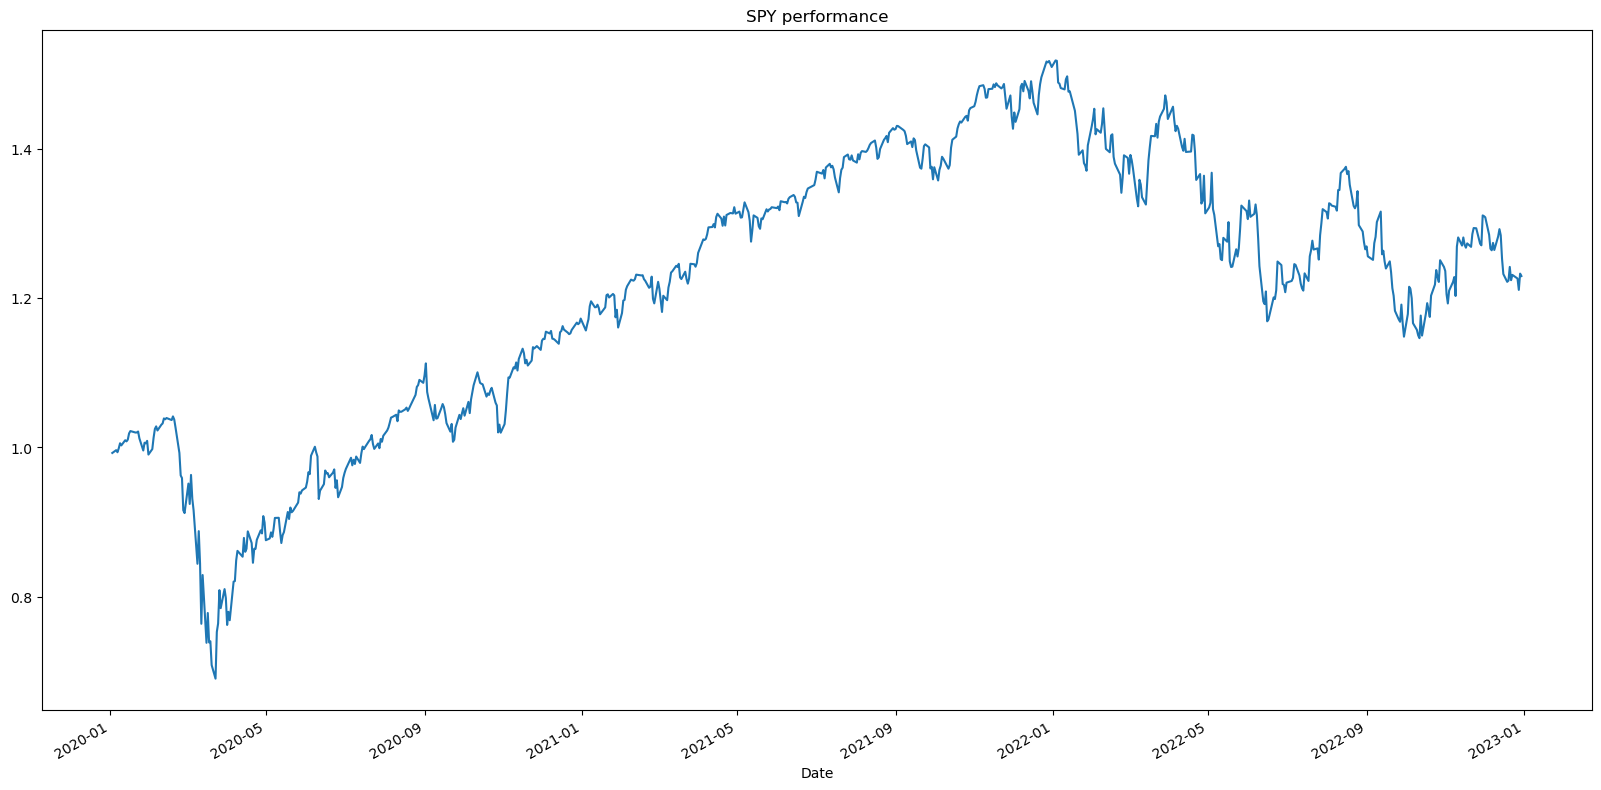

In [24]:
spy_cum_returns.plot(figsize= (20,10), title='SPY performance')

In [25]:
portfolio_pct_chg = df['Close'].pct_change().dropna()

In [26]:
portfolio_pct_chg.head()

Symbols,PM,CZR,TAP,SAM,RGR
Date,,,,,
2020-01-03,-0.001882,-0.025206,-0.002955,-0.009215,0.008964
2020-01-06,0.011646,0.013618,0.023408,0.010525,0.020152
2020-01-07,0.004414,0.009014,-0.002555,0.006217,-0.004732
2020-01-08,0.018961,0.003371,0.009719,-0.001337,0.018214
2020-01-09,0.002751,-0.004032,-0.001108,-0.010445,-0.009583


In [27]:
port_cum_returns = (1 + portfolio_pct_chg).cumprod()

<AxesSubplot:title={'center':'VICE Portfolio Performance'}, xlabel='Date'>

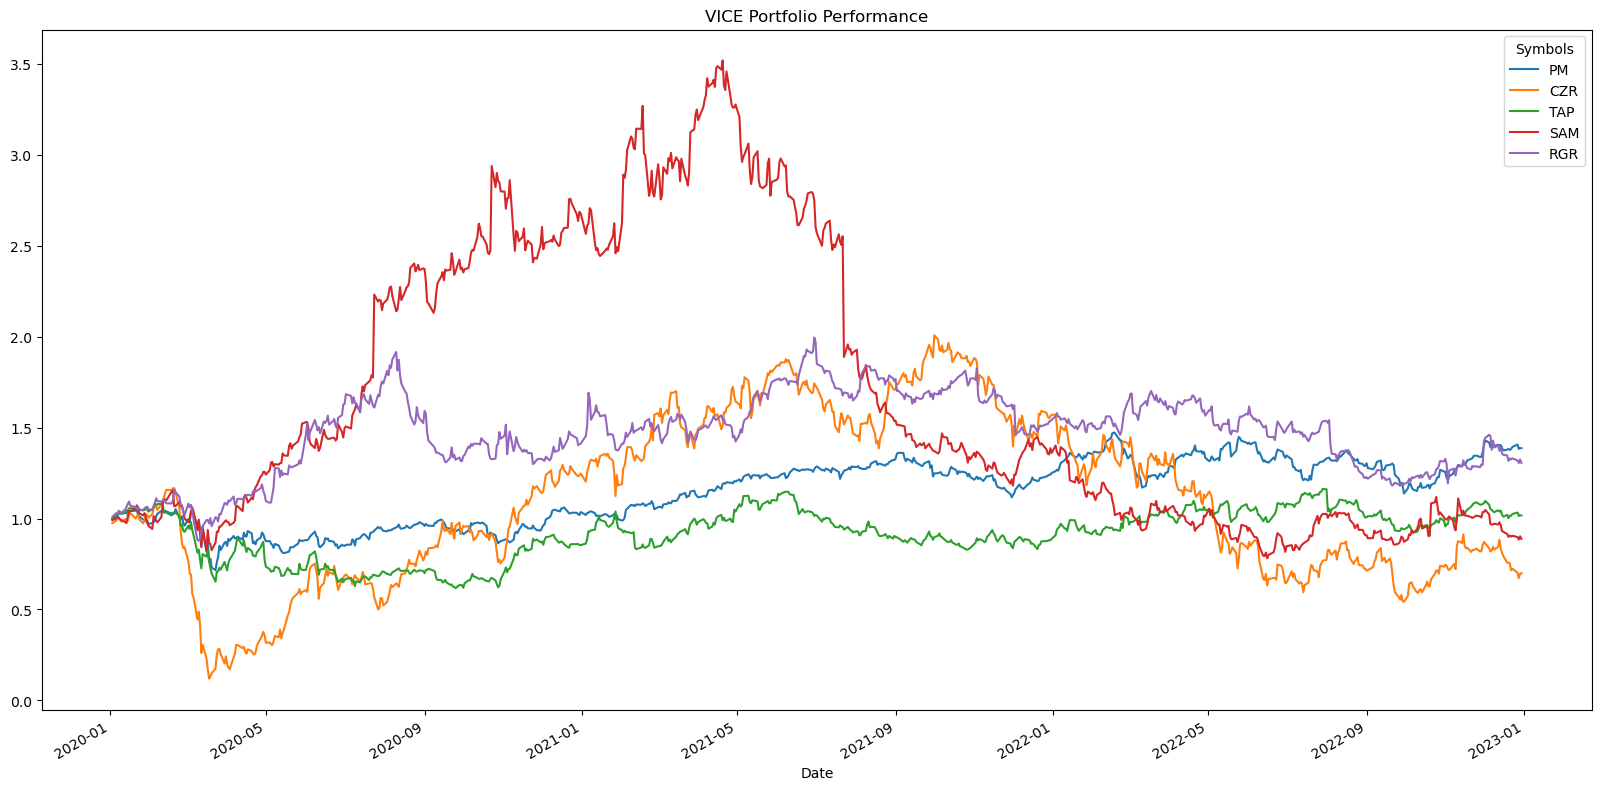

In [28]:
port_cum_returns.plot(figsize = (20, 10), title='VICE Portfolio Performance')

In [29]:
%matplotlib inline

In [30]:
portfolio_annual_returns = portfolio_pct_chg.mean() * 252

In [31]:
portfolio_annual_returns.head()

Symbols
PM     0.150593
CZR    0.281775
TAP    0.069914
SAM    0.091222
RGR    0.154904
dtype: float64

In [32]:
portfolio_annualize_std = portfolio_pct_chg.std() * np.sqrt(252)

In [33]:
portfolio_annualize_std.head()

Symbols
PM     0.286016
CZR    0.891244
TAP    0.358111
SAM    0.513006
RGR    0.362447
dtype: float64

In [34]:
portfolio_sharpe = portfolio_annual_returns / portfolio_annualize_std

In [35]:
portfolio_sharpe.sort_values()

Symbols
SAM    0.177818
TAP    0.195230
CZR    0.316159
RGR    0.427383
PM     0.526519
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='Symbols'>

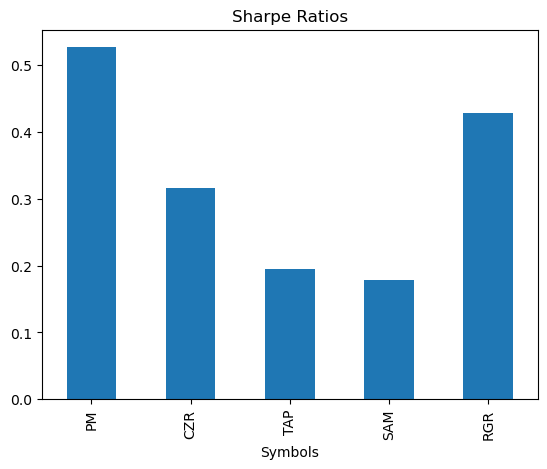

In [36]:
portfolio_sharpe.plot.bar(title='Sharpe Ratios')

<AxesSubplot:>

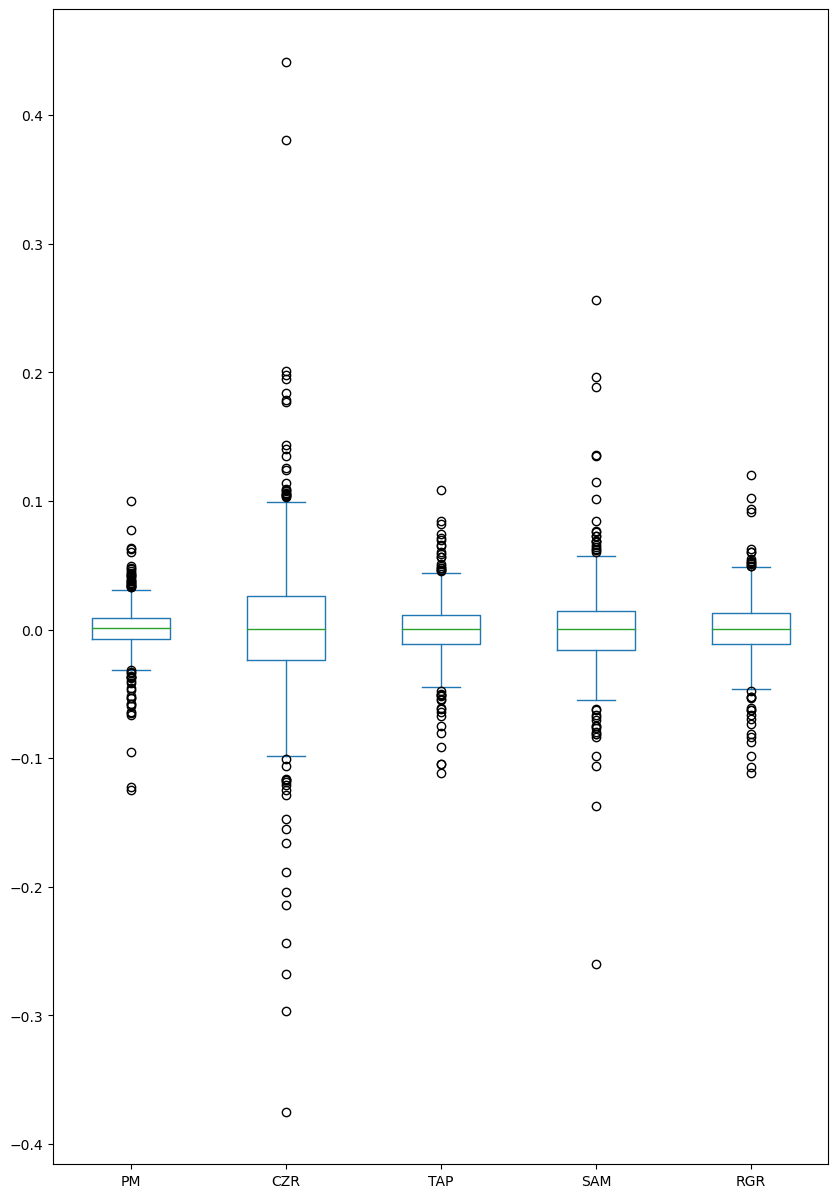

In [37]:
portfolio_pct_chg.plot(kind='box', figsize = (10, 15))

In [38]:
df_daily_std = pd.DataFrame(portfolio_pct_chg.std())

In [39]:
df_daily_std['Annual STDEV'] = df_daily_std * np.sqrt(252)

In [40]:
df_daily_std.head()

,0,Annual STDEV
Symbols,,
PM,0.018017,0.286016
CZR,0.056143,0.891244
TAP,0.022559,0.358111
SAM,0.032316,0.513006
RGR,0.022832,0.362447


In [41]:
portfolio_variance = portfolio_pct_chg.rolling(60).var()

In [42]:
portfolio_variance

Symbols,PM,CZR,TAP,SAM,RGR
Date,,,,,
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-23,0.000189,0.001686,0.000203,0.001515,0.000614
2022-12-27,0.000164,0.001707,0.000203,0.001504,0.000614
2022-12-28,0.000164,0.001694,0.000208,0.001505,0.000616


In [43]:
spy_variance = pct_chg_spy.rolling(60).var()

In [44]:
spy_variance

Date
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
2020-01-09         NaN
                ...   
2022-12-23    0.000260
2022-12-27    0.000256
2022-12-28    0.000248
2022-12-29    0.000238
2022-12-30    0.000238
Name: Close, Length: 755, dtype: float64

In [45]:
cov_portfolio_spy = portfolio_pct_chg.rolling(60).cov(pct_chg_spy)

In [46]:
cov_portfolio_spy.tail()

Symbols,PM,CZR,TAP,SAM,RGR
Date,,,,,
2022-12-23,0.000165,0.000543,0.000147,0.000326,0.000167
2022-12-27,0.000153,0.000543,0.000145,0.000319,0.000166
2022-12-28,0.000149,0.000530,0.000144,0.000316,0.000165
2022-12-29,0.000138,0.000483,0.000139,0.000307,0.000162
2022-12-30,0.000138,0.000483,0.000138,0.000308,0.000163


In [47]:
PM_beta = portfolio_pct_chg['PM'].cov(pct_chg_spy) / pct_chg_spy.var()
PM_beta

0.7226983207502619

In [48]:
CZR_beta = portfolio_pct_chg['CZR'].cov(pct_chg_spy) / pct_chg_spy.var()
CZR_beta

2.2120794800775854

In [49]:
TAP_beta = portfolio_pct_chg['TAP'].cov(pct_chg_spy) / pct_chg_spy.var()
TAP_beta

0.7565526542132358

In [50]:
SAM_beta = portfolio_pct_chg['SAM'].cov(pct_chg_spy) / pct_chg_spy.var()
SAM_beta

0.891855267535688

In [51]:
RGR_beta = portfolio_pct_chg['RGR'].cov(pct_chg_spy) / pct_chg_spy.var()
RGR_beta

0.43013632212109204

In [52]:
pm_rolling_beta = portfolio_pct_chg['PM'].rolling(60).cov(pct_chg_spy) / pct_chg_spy.rolling(60).var()
pm_rolling_beta.hvplot()

:Curve   [Date]   (0)

In [53]:
czr_rolling_beta = portfolio_pct_chg['CZR'].rolling(60).cov(pct_chg_spy) / pct_chg_spy.rolling(60).var()
czr_rolling_beta.hvplot()

:Curve   [Date]   (0)

In [54]:
tap_rolling_beta  = portfolio_pct_chg['TAP'].rolling(60).cov(pct_chg_spy) / pct_chg_spy.rolling(60).var()
tap_rolling_beta.hvplot()

:Curve   [Date]   (0)

In [55]:
sam_rolling_beta = portfolio_pct_chg['SAM'].rolling(60).cov(pct_chg_spy) / pct_chg_spy.rolling(60).var()
sam_rolling_beta.hvplot()

:Curve   [Date]   (0)

In [56]:
rgr_rolling_beta = portfolio_pct_chg['RGR'].rolling(60).cov(pct_chg_spy) / pct_chg_spy.rolling(60).var()
rgr_rolling_beta.hvplot()

:Curve   [Date]   (0)